In [5]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import random

In [7]:
import shap
shap.initjs()

In [8]:
subject = 'São Paulo - Consumo de Cimento (t)'
split_index = 12 #Referente aos 13 anos de input  

In [9]:
data = pd.read_csv('../../Inputs Atuais/2008_01_model_input_SP.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data = data.drop('São Paulo - Produção de Cimento (t)', axis=1)
data

,Ano,São Paulo - IDH Educacao,São Paulo - PIB - Estadual,São Paulo - PIB - Construção Civil,São Paulo - PIB - Per Capita,São Paulo - PIB - Preços de Mercado,São Paulo - IDH Renda,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),...,São Paulo - Desemprego,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),São Paulo - IDH Longevidade,São Paulo - Consumo de Cimento (t)
0,2008,0.809971,1.092396e+09,4.853082e+07,24.143787,9.946828e+08,0.794724,5.483335e+08,2.546644e+09,1.874883e+10,...,8.071263,18.095190,836.334300,1204.525858,15.181901,11.136027,78.961939,1.773094,0.851565,13476.268000
1,2009,0.812524,1.098669e+09,4.873392e+07,24.141551,9.947096e+08,0.793388,5.302764e+08,2.679945e+09,2.055015e+10,...,8.100327,17.457437,836.629901,1207.913300,15.173450,11.417327,80.559826,1.537503,0.853009,13304.301000
2,2010,0.814896,1.124010e+09,4.884708e+07,24.146600,9.985217e+08,0.792439,5.046425e+08,2.891930e+09,2.342247e+10,...,8.064867,17.476576,836.656415,1207.430943,14.880006,11.288684,81.499868,1.367891,0.853860,14534.980000
3,2011,0.817083,1.146637e+09,4.854680e+07,24.134292,1.000762e+09,0.791869,4.854622e+08,3.091988e+09,2.604265e+10,...,8.053175,17.341412,836.557224,1189.112243,14.815765,11.391381,82.321001,1.335640,0.854127,14871.943000
4,2012,0.818822,1.166721e+09,4.823983e+07,24.089660,1.002188e+09,0.791406,4.867661e+08,3.189506e+09,2.708753e+10,...,10.058484,16.745399,836.685833,1175.350304,14.895124,11.497643,82.512436,1.341854,0.853708,15159.683000
5,2013,0.821057,1.184231e+09,4.786423e+07,24.041932,1.003187e+09,0.792190,5.225848e+08,3.093872e+09,2.523394e+10,...,10.842573,15.620656,836.833718,1154.703253,15.020803,11.542975,82.278650,1.326810,0.852933,15089.297000
6,2014,0.822812,1.197826e+09,4.735435e+07,24.001434,1.003012e+09,0.792622,5.676413e+08,2.779340e+09,1.954361e+10,...,11.415800,15.750987,836.986331,1108.545094,15.247907,11.986366,82.848722,1.532951,0.851595,13714.511286
7,2015,0.823629,1.206909e+09,4.689336e+07,23.951008,1.001922e+09,0.792841,5.179392e+08,2.561731e+09,1.327596e+10,...,11.865646,15.893940,837.040042,1132.416417,15.520197,12.242333,82.064855,1.539659,0.849644,11767.653429
8,2016,0.832029,1.212819e+09,4.650979e+07,23.922375,1.001305e+09,0.785642,4.524144e+08,2.516859e+09,1.011370e+10,...,11.874466,15.955560,837.011044,1181.481000,15.455320,11.972800,81.279861,1.362167,0.857989,9811.084286
9,2017,0.831577,1.214213e+09,4.632537e+07,23.910733,1.000929e+09,0.785518,4.213689e+08,2.497710e+09,8.456309e+09,...,11.486716,16.984321,837.006952,1198.617570,15.304181,12.004953,82.751052,1.502384,0.855534,9918.501000


In [10]:
input_data = data.iloc[:-2, 1:-1]
input_data

,São Paulo - IDH Educacao,São Paulo - PIB - Estadual,São Paulo - PIB - Construção Civil,São Paulo - PIB - Per Capita,São Paulo - PIB - Preços de Mercado,São Paulo - IDH Renda,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),Contratação FGTS (Bi R$),...,São Paulo - IDH,São Paulo - Desemprego,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),São Paulo - IDH Longevidade
0,0.809971,1.092396e+09,4.853082e+07,24.143787,9.946828e+08,0.794724,5.483335e+08,2.546644e+09,1.874883e+10,2.351319e+10,...,0.818381,8.071263,18.095190,836.334300,1204.525858,15.181901,11.136027,78.961939,1.773094,0.851565
1,0.812524,1.098669e+09,4.873392e+07,24.141551,9.947096e+08,0.793388,5.302764e+08,2.679945e+09,2.055015e+10,2.446518e+10,...,0.819150,8.100327,17.457437,836.629901,1207.913300,15.173450,11.417327,80.559826,1.537503,0.853009
2,0.814896,1.124010e+09,4.884708e+07,24.146600,9.985217e+08,0.792439,5.046425e+08,2.891930e+09,2.342247e+10,2.606035e+10,...,0.819803,8.064867,17.476576,836.656415,1207.430943,14.880006,11.288684,81.499868,1.367891,0.853860
3,0.817083,1.146637e+09,4.854680e+07,24.134292,1.000762e+09,0.791869,4.854622e+08,3.091988e+09,2.604265e+10,2.845738e+10,...,0.820344,8.053175,17.341412,836.557224,1189.112243,14.815765,11.391381,82.321001,1.335640,0.854127
4,0.818822,1.166721e+09,4.823983e+07,24.089660,1.002188e+09,0.791406,4.867661e+08,3.189506e+09,2.708753e+10,3.181492e+10,...,0.820550,10.058484,16.745399,836.685833,1175.350304,14.895124,11.497643,82.512436,1.341854,0.853708
5,0.821057,1.184231e+09,4.786423e+07,24.041932,1.003187e+09,0.792190,5.225848e+08,3.093872e+09,2.523394e+10,3.629162e+10,...,0.821262,10.842573,15.620656,836.833718,1154.703253,15.020803,11.542975,82.278650,1.326810,0.852933
6,0.822812,1.197826e+09,4.735435e+07,24.001434,1.003012e+09,0.792622,5.676413e+08,2.779340e+09,1.954361e+10,4.143397e+10,...,0.821534,11.415800,15.750987,836.986331,1108.545094,15.247907,11.986366,82.848722,1.532951,0.851595
7,0.823629,1.206909e+09,4.689336e+07,23.951008,1.001922e+09,0.792841,5.179392e+08,2.561731e+09,1.327596e+10,4.469706e+10,...,0.821245,11.865646,15.893940,837.040042,1132.416417,15.520197,12.242333,82.064855,1.539659,0.849644
8,0.832029,1.212819e+09,4.650979e+07,23.922375,1.001305e+09,0.785642,4.524144e+08,2.516859e+09,1.011370e+10,4.640544e+10,...,0.824327,11.874466,15.955560,837.011044,1181.481000,15.455320,11.972800,81.279861,1.362167,0.857989
9,0.831577,1.214213e+09,4.632537e+07,23.910733,1.000929e+09,0.785518,4.213689e+08,2.497710e+09,8.456309e+09,4.607888e+10,...,0.823356,11.486716,16.984321,837.006952,1198.617570,15.304181,12.004953,82.751052,1.502384,0.855534


In [11]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-1)
target_data

0     13304.301000
1     14534.980000
2     14871.943000
3     15159.683000
4     15089.297000
5     13714.511286
6     11767.653429
7      9811.084286
8      9918.501000
9     10001.077000
10    10458.276000
11    11181.809000
12    12113.838000
13    12383.649000
14             NaN
Name: São Paulo - Consumo de Cimento (t), dtype: float64

In [12]:
# input para treinamento
train_input = (input_data.iloc[:-1] - np.mean(input_data.iloc[:-1], axis=0)) / np.std(input_data.iloc[:-1], axis=0)
train_input

,São Paulo - IDH Educacao,São Paulo - PIB - Estadual,São Paulo - PIB - Construção Civil,São Paulo - PIB - Per Capita,São Paulo - PIB - Preços de Mercado,São Paulo - IDH Renda,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),Contratação FGTS (Bi R$),...,São Paulo - IDH,São Paulo - Desemprego,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),São Paulo - IDH Longevidade
0,-1.601914,-1.819408,1.003478,1.202107,-1.961368,1.285446,1.204752,-0.990234,0.166091,-1.487840,...,-1.705828,-1.355043,1.636748,-2.157967,0.548623,0.114751,-1.578154,-2.418314,2.112223,-0.575401
1,-1.272998,-1.675567,1.209427,1.179772,-1.951541,0.894167,0.820657,-0.546688,0.428911,-1.378556,...,-1.234652,-1.336507,0.960381,-0.797175,0.643440,0.075193,-0.842756,-1.158674,0.402706,0.032912
2,-0.967315,-1.094542,1.324177,1.230212,-0.558611,0.616212,0.275392,0.158672,0.847995,-1.195437,...,-0.834215,-1.359122,0.980679,-0.675119,0.629939,-1.298380,-1.179065,-0.417623,-0.828049,0.391069
3,-0.685507,-0.575726,1.019683,1.107266,0.259840,0.449046,-0.132596,0.824346,1.230291,-0.920269,...,-0.503056,-1.366579,0.837331,-1.131742,0.117185,-1.599084,-0.910586,0.229689,-1.062071,0.503752
4,-0.461531,-0.115211,0.708407,0.661426,0.781023,0.313381,-0.104860,1.148829,1.382743,-0.534838,...,-0.376604,-0.087675,0.205232,-0.539690,-0.268021,-1.227616,-0.632790,0.380601,-1.016982,0.327130
5,-0.173555,0.286253,0.327534,0.184658,1.145924,0.543033,0.657046,0.830615,1.112297,-0.020933,...,0.060098,0.412385,-0.987611,0.141096,-0.845947,-0.639328,-0.514278,0.196304,-1.126146,0.001028
6,0.052526,0.597984,-0.189503,-0.219884,1.082248,0.669744,1.615453,-0.215960,0.282052,0.569384,...,0.226730,0.777966,-0.849388,0.843646,-2.137947,0.423719,0.644870,0.645700,0.369675,-0.562814
7,0.157871,0.806234,-0.656965,-0.723606,0.683738,0.733766,0.558230,-0.940033,-0.632425,0.943972,...,0.049709,1.064859,-0.697781,1.090901,-1.469772,1.698271,1.314042,0.027766,0.418348,-1.384206
8,1.240079,0.941752,-1.045917,-1.009627,0.458458,-1.375468,-0.835563,-1.089341,-1.093812,1.140087,...,1.938197,1.070484,-0.632429,0.957410,-0.096419,1.394591,0.609405,-0.591059,-0.869586,2.130112
9,1.181857,0.973717,-1.232918,-1.125922,0.321024,-1.411648,-1.495939,-1.153056,-1.335633,1.102599,...,1.343468,0.823193,0.458620,0.938576,0.383246,0.687130,0.693462,0.568705,0.147869,1.096015


In [13]:
# Alvo para treinamento
train_target = target_data.iloc[:split_index]
train_target

0     13304.301000
1     14534.980000
2     14871.943000
3     15159.683000
4     15089.297000
5     13714.511286
6     11767.653429
7      9811.084286
8      9918.501000
9     10001.077000
10    10458.276000
11    11181.809000
Name: São Paulo - Consumo de Cimento (t), dtype: float64

In [14]:
#input de test (Ano 2021)
test_input = ((input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)).iloc[-1:]
test_input

,São Paulo - IDH Educacao,São Paulo - PIB - Estadual,São Paulo - PIB - Construção Civil,São Paulo - PIB - Per Capita,São Paulo - PIB - Preços de Mercado,São Paulo - IDH Renda,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),Contratação FGTS (Bi R$),...,São Paulo - IDH,São Paulo - Desemprego,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),São Paulo - IDH Longevidade
12,1.001135,0.409525,-0.926633,-1.322522,-1.033191,-1.385738,1.108405,2.635823,-0.189959,0.726405,...,-1.092902,0.514165,-0.901047,-0.751547,0.232288,-0.363994,-0.503159,-0.998268,-1.560012,-2.468148


In [15]:
# Alvo de test (Ano 2021)
test_target = target_data.iloc[split_index:-2]
test_target

12    12113.838
Name: São Paulo - Consumo de Cimento (t), dtype: float64

In [16]:
# Rede neural feed-forward com optmizador Estocástico
def neural_network_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2048, activation='tanh', input_shape=(train_input.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_data=(train_input.iloc[-1:], train_target.iloc[-1:]),
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [17]:
def get_a_good_seed(train_input, train_target, test_target, test_input):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(100)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = neural_network_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")

    return winner_seed

In [18]:
winner_seed = 2446989432

In [26]:
trained_model, history = neural_network_model(train_input, train_target, want_verbose=1, seed=winner_seed)

Epoch 1/10000
1/1 [==============================] - 0s 466ms/step - loss: 160210192.0000 - val_loss: 129997544.0000
Epoch 2/10000
1/1 [==============================] - 0s 14ms/step - loss: 152005840.0000 - val_loss: 16270796.0000
Epoch 3/10000
1/1 [==============================] - 0s 14ms/step - loss: 231169360.0000 - val_loss: 190678800.0000
Epoch 4/10000
1/1 [==============================] - 0s 15ms/step - loss: 140719888.0000 - val_loss: 186487456.0000
Epoch 5/10000
1/1 [==============================] - 0s 16ms/step - loss: 135730944.0000 - val_loss: 169866464.0000
Epoch 6/10000
1/1 [==============================] - 0s 16ms/step - loss: 140892208.0000 - val_loss: 193958720.0000
Epoch 7/10000
1/1 [==============================] - 0s 20ms/step - loss: 147113744.0000 - val_loss: 119499592.0000
Epoch 8/10000
1/1 [==============================] - 0s 15ms/step - loss: 141694608.0000 - val_loss: 196872848.0000
Epoch 9/10000
1/1 [==============================] - 0s 15ms/step - loss

Epoch 72/10000
1/1 [==============================] - 0s 16ms/step - loss: 36025132.0000 - val_loss: 24592872.0000
Epoch 73/10000
1/1 [==============================] - 0s 17ms/step - loss: 33843500.0000 - val_loss: 25454878.0000
Epoch 74/10000
1/1 [==============================] - 0s 16ms/step - loss: 39140820.0000 - val_loss: 30330394.0000
Epoch 75/10000
1/1 [==============================] - 0s 18ms/step - loss: 36198808.0000 - val_loss: 39734728.0000
Epoch 76/10000
1/1 [==============================] - 0s 19ms/step - loss: 34782028.0000 - val_loss: 32397842.0000
Epoch 77/10000
1/1 [==============================] - 0s 15ms/step - loss: 33951364.0000 - val_loss: 31604304.0000
Epoch 78/10000
1/1 [==============================] - 0s 14ms/step - loss: 32373072.0000 - val_loss: 22337172.0000
Epoch 79/10000
1/1 [==============================] - 0s 14ms/step - loss: 30278970.0000 - val_loss: 20031368.0000
Epoch 80/10000
1/1 [==============================] - 0s 14ms/step - loss: 36034

Epoch 143/10000
1/1 [==============================] - 0s 14ms/step - loss: 8963343.0000 - val_loss: 14151013.0000
Epoch 144/10000
1/1 [==============================] - 0s 14ms/step - loss: 10673601.0000 - val_loss: 15171984.0000
Epoch 145/10000
1/1 [==============================] - 0s 18ms/step - loss: 9890582.0000 - val_loss: 16832674.0000
Epoch 146/10000
1/1 [==============================] - 0s 15ms/step - loss: 8545565.0000 - val_loss: 17503282.0000
Epoch 147/10000
1/1 [==============================] - 0s 15ms/step - loss: 8996417.0000 - val_loss: 19352280.0000
Epoch 148/10000
1/1 [==============================] - 0s 14ms/step - loss: 9658709.0000 - val_loss: 16686850.0000
Epoch 149/10000
1/1 [==============================] - 0s 15ms/step - loss: 9040903.0000 - val_loss: 17296124.0000
Epoch 150/10000
1/1 [==============================] - 0s 14ms/step - loss: 8556867.0000 - val_loss: 13191119.0000
Epoch 151/10000
1/1 [==============================] - 0s 15ms/step - loss: 721

Epoch 215/10000
1/1 [==============================] - 0s 15ms/step - loss: 2754468.2500 - val_loss: 2944307.5000
Epoch 216/10000
1/1 [==============================] - 0s 15ms/step - loss: 2810670.2500 - val_loss: 3128341.7500
Epoch 217/10000
1/1 [==============================] - 0s 15ms/step - loss: 2679359.7500 - val_loss: 3233320.2500
Epoch 218/10000
1/1 [==============================] - 0s 16ms/step - loss: 2433509.2500 - val_loss: 2964127.2500
Epoch 219/10000
1/1 [==============================] - 0s 15ms/step - loss: 2508708.0000 - val_loss: 2890478.2500
Epoch 220/10000
1/1 [==============================] - 0s 15ms/step - loss: 2529287.7500 - val_loss: 3384234.5000
Epoch 221/10000
1/1 [==============================] - 0s 14ms/step - loss: 2304547.7500 - val_loss: 3147010.2500
Epoch 222/10000
1/1 [==============================] - 0s 14ms/step - loss: 2437259.7500 - val_loss: 2855403.5000
Epoch 223/10000
1/1 [==============================] - 0s 14ms/step - loss: 2625472.0000

1/1 [==============================] - 0s 14ms/step - loss: 1284496.3750 - val_loss: 418476.3125
Epoch 288/10000
1/1 [==============================] - 0s 14ms/step - loss: 854796.5000 - val_loss: 684681.9375
Epoch 289/10000
1/1 [==============================] - 0s 14ms/step - loss: 802418.0000 - val_loss: 595444.3125
Epoch 290/10000
1/1 [==============================] - 0s 14ms/step - loss: 792780.7500 - val_loss: 583147.0000
Epoch 291/10000
1/1 [==============================] - 0s 15ms/step - loss: 795766.5625 - val_loss: 577512.4375
Epoch 292/10000
1/1 [==============================] - 0s 15ms/step - loss: 768037.3125 - val_loss: 542343.0625
Epoch 293/10000
1/1 [==============================] - 0s 15ms/step - loss: 759529.0625 - val_loss: 529178.1250
Epoch 294/10000
1/1 [==============================] - 0s 15ms/step - loss: 751681.4375 - val_loss: 503000.9375
Epoch 295/10000
1/1 [==============================] - 0s 14ms/step - loss: 975972.8125 - val_loss: 458515.4688
Epoch 2

1/1 [==============================] - 0s 15ms/step - loss: 446794.2500 - val_loss: 34960.9648
Epoch 434/10000
1/1 [==============================] - 0s 14ms/step - loss: 362963.6562 - val_loss: 55850.0586
Epoch 435/10000
1/1 [==============================] - 0s 15ms/step - loss: 354833.1250 - val_loss: 62579.6133
Epoch 436/10000
1/1 [==============================] - 0s 15ms/step - loss: 384869.1250 - val_loss: 327248.8125
Epoch 437/10000
1/1 [==============================] - 0s 15ms/step - loss: 455011.6562 - val_loss: 167415.2344
Epoch 438/10000
1/1 [==============================] - 0s 15ms/step - loss: 419277.5000 - val_loss: 179940.0000
Epoch 439/10000
1/1 [==============================] - 0s 15ms/step - loss: 413701.0938 - val_loss: 315438.0000
Epoch 440/10000
1/1 [==============================] - 0s 15ms/step - loss: 340863.5938 - val_loss: 244493.5469
Epoch 441/10000
1/1 [==============================] - 0s 14ms/step - loss: 343509.4688 - val_loss: 239281.4844
Epoch 442/1

1/1 [==============================] - 0s 15ms/step - loss: 312152.6250 - val_loss: 114616.6328
Epoch 580/10000
1/1 [==============================] - 0s 14ms/step - loss: 293626.1562 - val_loss: 143668.3906
Epoch 581/10000
1/1 [==============================] - 0s 15ms/step - loss: 250768.2656 - val_loss: 185317.6406
Epoch 582/10000
1/1 [==============================] - 0s 15ms/step - loss: 348455.2500 - val_loss: 86921.3203
Epoch 583/10000
1/1 [==============================] - 0s 15ms/step - loss: 327654.8750 - val_loss: 3142.5659
Epoch 584/10000
1/1 [==============================] - 0s 15ms/step - loss: 337568.8125 - val_loss: 30625.0000
Epoch 585/10000
1/1 [==============================] - 0s 15ms/step - loss: 360464.3438 - val_loss: 1065.5380
Epoch 586/10000
1/1 [==============================] - 0s 15ms/step - loss: 297925.7188 - val_loss: 13575.2080
Epoch 587/10000
1/1 [==============================] - 0s 16ms/step - loss: 262928.3438 - val_loss: 140094.5000
Epoch 588/10000

Epoch 728/10000
1/1 [==============================] - 0s 14ms/step - loss: 463891.3438 - val_loss: 718.5436
Epoch 729/10000
1/1 [==============================] - 0s 14ms/step - loss: 416991.3438 - val_loss: 968.2794
Epoch 730/10000
1/1 [==============================] - 0s 14ms/step - loss: 356025.0000 - val_loss: 204.1773
Epoch 731/10000
1/1 [==============================] - 0s 14ms/step - loss: 445440.6250 - val_loss: 279.1902
Epoch 732/10000
1/1 [==============================] - 0s 15ms/step - loss: 414464.4062 - val_loss: 938.0701
Epoch 733/10000
1/1 [==============================] - 0s 15ms/step - loss: 523477.0000 - val_loss: 1232.2568
Epoch 734/10000
1/1 [==============================] - 0s 14ms/step - loss: 414049.0938 - val_loss: 1584.1022
Epoch 735/10000
1/1 [==============================] - 0s 14ms/step - loss: 424523.8438 - val_loss: 2510.4602
Epoch 736/10000
1/1 [==============================] - 0s 14ms/step - loss: 356580.5938 - val_loss: 344.6389
Epoch 737/10000


Epoch 803/10000
1/1 [==============================] - 0s 15ms/step - loss: 307703.5312 - val_loss: 881.2897
Epoch 804/10000
1/1 [==============================] - 0s 15ms/step - loss: 317677.7188 - val_loss: 2046.0603
Epoch 805/10000
1/1 [==============================] - 0s 15ms/step - loss: 317327.9062 - val_loss: 846.3895
Epoch 806/10000
1/1 [==============================] - 0s 15ms/step - loss: 430250.5312 - val_loss: 1112.0662
Epoch 807/10000
1/1 [==============================] - 0s 15ms/step - loss: 343788.0312 - val_loss: 277.5283
Epoch 808/10000
1/1 [==============================] - 0s 15ms/step - loss: 445359.7500 - val_loss: 4538.2065
Epoch 809/10000
1/1 [==============================] - 0s 15ms/step - loss: 414747.2812 - val_loss: 95.1577
Epoch 810/10000
1/1 [==============================] - 0s 15ms/step - loss: 445777.7188 - val_loss: 3239.6553
Epoch 811/10000
1/1 [==============================] - 0s 15ms/step - loss: 461984.7812 - val_loss: 5552.7241
Epoch 812/10000

Epoch 952/10000
1/1 [==============================] - 0s 15ms/step - loss: 378863.5938 - val_loss: 6910.4150
Epoch 953/10000
1/1 [==============================] - 0s 15ms/step - loss: 361494.7500 - val_loss: 132.3399
Epoch 954/10000
1/1 [==============================] - 0s 14ms/step - loss: 471606.8438 - val_loss: 15990.1455
Epoch 955/10000
1/1 [==============================] - 0s 15ms/step - loss: 487715.5000 - val_loss: 513.8368
Epoch 956/10000
1/1 [==============================] - 0s 14ms/step - loss: 421385.3750 - val_loss: 3783.4512
Epoch 957/10000
1/1 [==============================] - 0s 15ms/step - loss: 379794.2500 - val_loss: 11533.3760
Epoch 958/10000
1/1 [==============================] - 0s 15ms/step - loss: 478864.4688 - val_loss: 112.3724
Epoch 959/10000
1/1 [==============================] - 0s 14ms/step - loss: 329055.0938 - val_loss: 26062.6973
Epoch 960/10000
1/1 [==============================] - 0s 18ms/step - loss: 386871.1250 - val_loss: 15459.4258
Epoch 961

1/1 [==============================] - 0s 15ms/step - loss: 507238.5938 - val_loss: 18587.7539
Epoch 1101/10000
1/1 [==============================] - 0s 15ms/step - loss: 417706.5938 - val_loss: 2826.6252
Epoch 1102/10000
1/1 [==============================] - 0s 14ms/step - loss: 301747.1562 - val_loss: 5309.3423
Epoch 1103/10000
1/1 [==============================] - 0s 14ms/step - loss: 476578.5000 - val_loss: 852.2523
Epoch 1104/10000
1/1 [==============================] - 0s 14ms/step - loss: 291305.5625 - val_loss: 24864.4238
Epoch 1105/10000
1/1 [==============================] - 0s 14ms/step - loss: 454021.6250 - val_loss: 212.7781
Epoch 1106/10000
1/1 [==============================] - 0s 15ms/step - loss: 302819.2812 - val_loss: 7069.9521
Epoch 1107/10000
1/1 [==============================] - 0s 15ms/step - loss: 262975.5938 - val_loss: 21477.1309
Epoch 1108/10000
1/1 [==============================] - 0s 15ms/step - loss: 430378.9062 - val_loss: 14.7294
Epoch 1109/10000
1/

1/1 [==============================] - 0s 15ms/step - loss: 463423.7500 - val_loss: 1390.7655
Epoch 1175/10000
1/1 [==============================] - 0s 15ms/step - loss: 470193.3438 - val_loss: 5358.4116
Epoch 1176/10000
1/1 [==============================] - 0s 15ms/step - loss: 467976.3438 - val_loss: 5530.0430
Epoch 1177/10000
1/1 [==============================] - 0s 15ms/step - loss: 306730.0000 - val_loss: 1268.9319
Epoch 1178/10000
1/1 [==============================] - 0s 18ms/step - loss: 282094.4688 - val_loss: 19688.9688
Epoch 1179/10000
1/1 [==============================] - 0s 15ms/step - loss: 525171.3125 - val_loss: 4389.0625
Epoch 1180/10000
1/1 [==============================] - 0s 14ms/step - loss: 396571.7188 - val_loss: 31719.4707
Epoch 1181/10000
1/1 [==============================] - 0s 16ms/step - loss: 256052.9531 - val_loss: 7503.2139
Epoch 1182/10000
1/1 [==============================] - 0s 17ms/step - loss: 482396.5312 - val_loss: 1052.5715
Epoch 1183/10000

1/1 [==============================] - 0s 14ms/step - loss: 438436.9062 - val_loss: 766.4895
Epoch 1322/10000
1/1 [==============================] - 0s 14ms/step - loss: 465987.6562 - val_loss: 1634.8755
Epoch 1323/10000
1/1 [==============================] - 0s 16ms/step - loss: 412714.3750 - val_loss: 44.0979
Epoch 1324/10000
1/1 [==============================] - 0s 19ms/step - loss: 467827.0000 - val_loss: 3.4428e-04
Epoch 1325/10000
1/1 [==============================] - 0s 15ms/step - loss: 410552.9062 - val_loss: 24.6109
Epoch 1326/10000
1/1 [==============================] - 0s 15ms/step - loss: 454200.5000 - val_loss: 6325.5303
Epoch 1327/10000
1/1 [==============================] - 0s 15ms/step - loss: 428318.5312 - val_loss: 32.5479
Epoch 1328/10000
1/1 [==============================] - 0s 14ms/step - loss: 429836.3438 - val_loss: 1436.8838
Epoch 1329/10000
1/1 [==============================] - 0s 15ms/step - loss: 432684.0312 - val_loss: 308.6129
Epoch 1330/10000
1/1 [===

1/1 [==============================] - 0s 14ms/step - loss: 425971.2500 - val_loss: 1904.1632
Epoch 1470/10000
1/1 [==============================] - 0s 14ms/step - loss: 412833.6250 - val_loss: 210.5333
Epoch 1471/10000
1/1 [==============================] - 0s 14ms/step - loss: 438855.1250 - val_loss: 954.8945
Epoch 1472/10000
1/1 [==============================] - 0s 14ms/step - loss: 464260.3438 - val_loss: 3577.0679
Epoch 1473/10000
1/1 [==============================] - 0s 15ms/step - loss: 472818.0938 - val_loss: 2046.0603
Epoch 1474/10000
1/1 [==============================] - 0s 15ms/step - loss: 455188.7500 - val_loss: 475.4444
Epoch 1475/10000
1/1 [==============================] - 0s 15ms/step - loss: 464323.4062 - val_loss: 3029.4060
Epoch 1476/10000
1/1 [==============================] - 0s 14ms/step - loss: 426233.7500 - val_loss: 618.7656
Epoch 1477/10000
1/1 [==============================] - 0s 15ms/step - loss: 471046.3750 - val_loss: 509.3308
Epoch 1478/10000
1/1 [=

1/1 [==============================] - 0s 14ms/step - loss: 410529.9062 - val_loss: 285.2932
Epoch 1618/10000
1/1 [==============================] - 0s 14ms/step - loss: 436789.9688 - val_loss: 5157.5962
Epoch 1619/10000
1/1 [==============================] - 0s 15ms/step - loss: 418238.8438 - val_loss: 54.6502
Epoch 1620/10000
1/1 [==============================] - 0s 14ms/step - loss: 429596.8438 - val_loss: 714.1003
Epoch 1621/10000
1/1 [==============================] - 0s 14ms/step - loss: 412758.0938 - val_loss: 672.6019
Epoch 1622/10000
1/1 [==============================] - 0s 15ms/step - loss: 412724.9062 - val_loss: 14.0113
Epoch 1623/10000
1/1 [==============================] - 0s 15ms/step - loss: 502826.2188 - val_loss: 579.7091
Epoch 1624/10000
1/1 [==============================] - 0s 19ms/step - loss: 435485.0938 - val_loss: 20.4085
Epoch 1625/10000
1/1 [==============================] - 0s 15ms/step - loss: 410493.7188 - val_loss: 135.6633
Epoch 1626/10000
1/1 [=======

1/1 [==============================] - 0s 15ms/step - loss: 424361.0000 - val_loss: 5216.5352
Epoch 1766/10000
1/1 [==============================] - 0s 17ms/step - loss: 426936.4062 - val_loss: 7291.0586
Epoch 1767/10000
1/1 [==============================] - 0s 16ms/step - loss: 423235.2188 - val_loss: 4221.9536
Epoch 1768/10000
1/1 [==============================] - 0s 18ms/step - loss: 450454.1562 - val_loss: 283.1201
Epoch 1769/10000
1/1 [==============================] - 0s 19ms/step - loss: 409975.7812 - val_loss: 50811.0586
Epoch 1770/10000
1/1 [==============================] - 0s 16ms/step - loss: 423418.8438 - val_loss: 75993.9062
Epoch 1771/10000
1/1 [==============================] - 0s 14ms/step - loss: 415476.5938 - val_loss: 71226.4375
Epoch 1772/10000
1/1 [==============================] - 0s 17ms/step - loss: 464793.1562 - val_loss: 39637.5430
Epoch 1773/10000
1/1 [==============================] - 0s 15ms/step - loss: 420213.5312 - val_loss: 73066.7344
Epoch 1774/100

In [27]:
trained_model.save('model_sp.keras')

In [28]:
prediction = trained_model.predict(test_input)
print(f"{test_target.values}(test_target) - {prediction}(prediction) = {mean_absolute_error(test_target, prediction)}")

1/1 [==============================] - 0s 36ms/step
[12113.838](test_target) - [[11181.827]](prediction) = 932.0108515624997


In [29]:
def f(X):
    model = tf.keras.models.load_model('model_sp.keras')
    return model.predict(X)

In [32]:
def shap_explainer(train_input, test_input, test_target):
    explainer = shap.KernelExplainer(f, pd.DataFrame(np.zeros((1, len(train_input.columns.tolist()))), columns=test_input.columns))
    shap_values = explainer.shap_values(test_input)
    exp = shap.Explanation(shap_values[0], explainer.expected_value, test_input, feature_names=test_input.columns)
    display(shap_values[0])
    display(shap.waterfall_plot(exp[0]))
    return shap_values[0][0], explainer

def shap_team_reward(exp, sv, test_target, prediction):
    if abs((test_target.values - prediction[0])[0])/test_target.values < 0.05:
        sv =  np.abs(sv) 
    else:
        if (test_target.values - prediction[0])[0] < 0:
            sv = (-1)*sv
    display(sv)
    return sv 

def shap_abs(exp, sv, test_target, prediction):
    return np.abs(sv) 

def shap_omission_penaltier(exp, sv, test_target, prediction):
    sv[sv == 0.0] = -abs((test_target.values - prediction[0])[0])
    return sv 

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 626us/step


array([[ -33.3711122 ,  -74.01421885, -133.2912647 ,  -81.83402361,
         112.26682829,  -46.811816  ,   91.28780821,   96.75609633,
         -67.0631915 , -206.27366426,  219.55647063,  -17.94352346,
         -63.6871981 ,  150.56240527,  -31.67709611, -221.92366756,
        -202.77042174, -209.13412718, -145.04698238,  -23.99122713,
           0.        ,   68.5176817 , -158.48547572, -113.59100831,
           0.        ,  -23.08062169,  -67.48394025,  -99.76751401,
        -156.92674514, -276.07239785,    0.        , -212.0692764 ,
         -74.84954065,  -47.4518276 ,   79.52931696,   74.80387786,
         376.42370266,  -44.30755317,  102.29960758,  146.66097842,
         -74.98552356,  240.38616941,  -96.2911673 ,  -75.57721552,
         -28.16951449,   83.22621692, -191.52504511,  -92.40683392,
         137.72394707,  -57.73439523,   82.06939571, -176.2907041 ,
         -72.60852005, -195.88495102,  -16.0226096 , -312.27644784,
        -286.56557074, -179.99100932, -141.35283

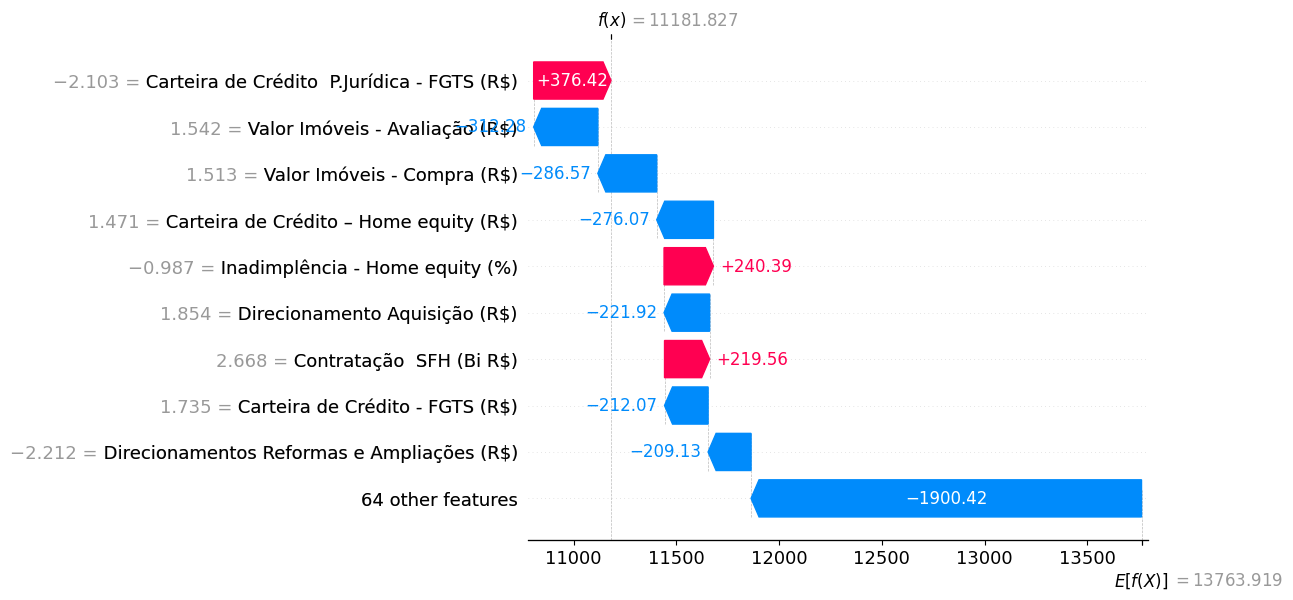

None

In [33]:
explainer = shap.KernelExplainer(f, pd.DataFrame(np.zeros((1, len(train_input.columns.tolist()))), columns=test_input.columns))
shap_values = explainer.shap_values(test_input)
exp = shap.Explanation(shap_values[0], explainer.expected_value, test_input, feature_names=test_input.columns)

display(shap_values[0])
display(shap.force_plot(explainer.expected_value, shap_values[0], test_input))
display(shap.waterfall_plot(exp[0]))

In [34]:
def model_time_series_mae_tester(data, window, seed):
    if window > 2:
        
        # Copia e organiza data geral
        predictions = []
        targets = []
        shap_calc = []
        data_copy = data.copy()
        data_copy[subject] = data[subject].shift(-1)
        data_copy = data_copy.iloc[:-1,1:]
        
        input_df = data_copy.iloc[:, :-1]
        target_df = data_copy.iloc[:, -1:]

        for i in range(window, len(data_copy) + 1):
            
            train_input = input_df.iloc[:i - 1]
            train_input = (train_input - np.mean(train_input, axis=0)) / np.std(train_input, axis=0)
            
            train_target = target_df.iloc[:i - 1]


            test_input = input_df.iloc[:i]
            test_input = ((test_input - np.mean(test_input, axis=0)) / np.std(test_input, axis=0)).iloc[-1:]
            
            test_target = target_df.iloc[i - 1:i]

            model, hitory = neural_network_model(train_input, train_target, want_verbose=0, seed=seed)
            model.save('model_sp.keras')
            
            prediction = model.predict(test_input)
            shap_calc_values, exp = shap_explainer(train_input, test_input, test_target)
            
            predictions.append(prediction[0].item())
            targets.append(test_target.iloc[0, 0])
            
            
            shap_calc.append(shap_team_reward(exp, shap_calc_values, test_target, prediction))
            
            print(f"{test_target.values}(test_target) - {prediction}(prediction) = {(test_target.values - prediction[0])[0]}")
            display("-------------------------------------------------------------------")

        return predictions, targets, np.sum(shap_calc, axis=0)

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 632us/step


array([[33.30660773,  0.        ,  0.        ,  0.        ,  8.59239668,
        27.26971027, 41.44606728,  0.        ,  0.        ,  0.        ,
        37.19140887,  0.        , 30.13270625, 26.56014055, 15.43899012,
         0.59340834, 29.03308261,  0.        ,  0.        , 41.86116009,
         7.78812499,  0.        ,  5.63942623,  0.        ,  4.43081316,
         6.11184381,  0.        ,  0.        , 37.19469708, 53.28146407,
        56.05849871, 27.38786156, 49.84247246,  0.        ,  0.        ,
         0.        , 19.05510187, 10.09766182, 22.83674938, 11.37995985,
        25.24704684,  0.        ,  0.        ,  0.        ,  0.        ,
        25.20570088,  1.36264644, 61.45916422,  8.85158892,  0.        ,
         0.        ,  0.        , 25.05062827, 39.14260149,  0.        ,
        29.23717479, 32.83094529,  0.        ,  0.        ,  1.98546592,
         0.        , 47.6597112 ,  0.        , 11.83377392,  0.        ,
         8.87275301,  0.        ,  0.        ,  0. 

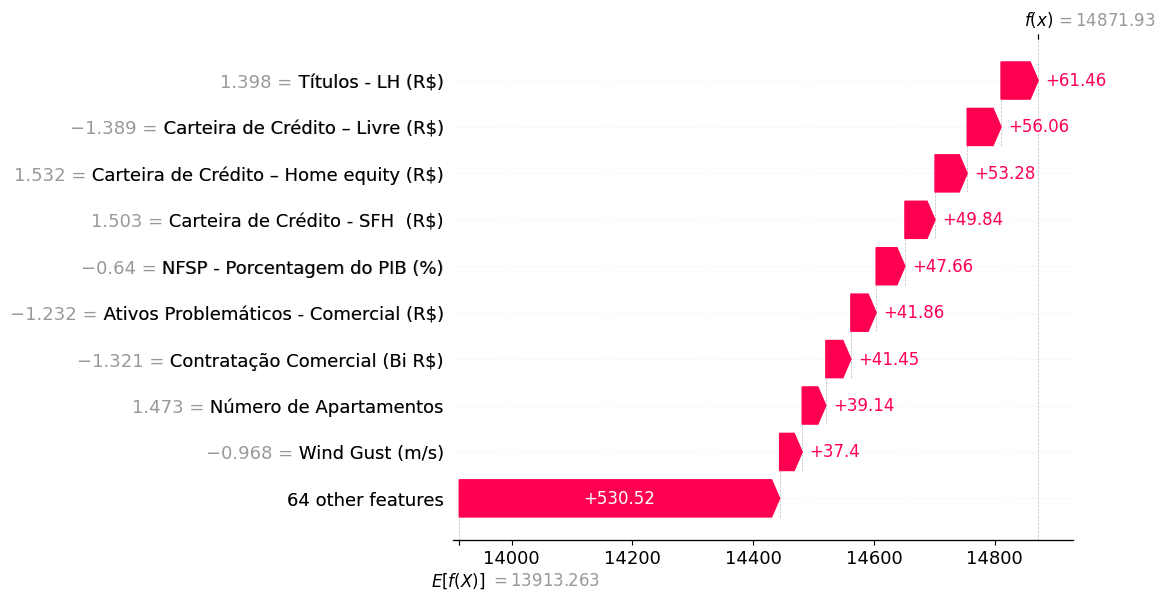

None

'abs true'

array([33.30660773,  0.        ,  0.        ,  0.        ,  8.59239668,
       27.26971027, 41.44606728,  0.        ,  0.        ,  0.        ,
       37.19140887,  0.        , 30.13270625, 26.56014055, 15.43899012,
        0.59340834, 29.03308261,  0.        ,  0.        , 41.86116009,
        7.78812499,  0.        ,  5.63942623,  0.        ,  4.43081316,
        6.11184381,  0.        ,  0.        , 37.19469708, 53.28146407,
       56.05849871, 27.38786156, 49.84247246,  0.        ,  0.        ,
        0.        , 19.05510187, 10.09766182, 22.83674938, 11.37995985,
       25.24704684,  0.        ,  0.        ,  0.        ,  0.        ,
       25.20570088,  1.36264644, 61.45916422,  8.85158892,  0.        ,
        0.        ,  0.        , 25.05062827, 39.14260149,  0.        ,
       29.23717479, 32.83094529,  0.        ,  0.        ,  1.98546592,
        0.        , 47.6597112 ,  0.        , 11.83377392,  0.        ,
        8.87275301,  0.        ,  0.        ,  0.        ,  0.  

[[15159.683]](test_target) - [[14871.93]](prediction) = [287.7533125]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 601us/step


array([[ 36.44094033,   0.        ,   0.        ,   0.        ,
         34.33460276,  17.60617179,  40.22564802,   0.        ,
          7.65716188,   8.07728279,  43.7894448 ,   2.26134897,
         23.73561421,  18.08047718,  12.19252681,  10.06913046,
         29.05946184,   0.        ,   6.1085824 ,  36.1108359 ,
          6.13072814, -68.38371113,  -0.18968915,   0.        ,
         14.10160544,   0.        ,   0.        ,   4.2149711 ,
        -32.72613635,  43.90524156,  44.20429265,  35.22305349,
         42.45375568,   0.        ,   0.        ,   0.        ,
         28.31239532,  19.03749293,  27.85676779,  20.39306251,
         28.68083918, -27.85864302,   0.        ,  14.14100457,
          0.        ,  25.96833178,  10.60298773,  51.26925627,
         18.70036383,   0.        , -44.48414646,   0.        ,
         21.79886026,  33.69308979,   0.        ,  53.64572545,
         25.50544205,  10.01030999,   5.02095927,   0.        ,
          0.        ,  49.41839284,   0.

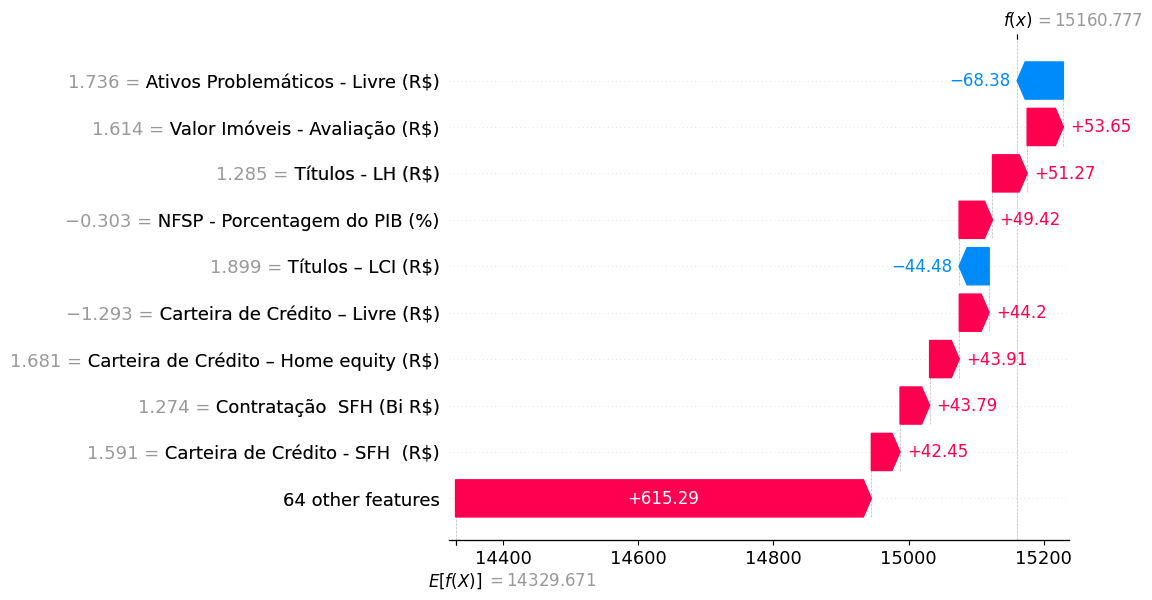

None

'abs true'

array([36.44094033,  0.        ,  0.        ,  0.        , 34.33460276,
       17.60617179, 40.22564802,  0.        ,  7.65716188,  8.07728279,
       43.7894448 ,  2.26134897, 23.73561421, 18.08047718, 12.19252681,
       10.06913046, 29.05946184,  0.        ,  6.1085824 , 36.1108359 ,
        6.13072814, 68.38371113,  0.18968915,  0.        , 14.10160544,
        0.        ,  0.        ,  4.2149711 , 32.72613635, 43.90524156,
       44.20429265, 35.22305349, 42.45375568,  0.        ,  0.        ,
        0.        , 28.31239532, 19.03749293, 27.85676779, 20.39306251,
       28.68083918, 27.85864302,  0.        , 14.14100457,  0.        ,
       25.96833178, 10.60298773, 51.26925627, 18.70036383,  0.        ,
       44.48414646,  0.        , 21.79886026, 33.69308979,  0.        ,
       53.64572545, 25.50544205, 10.01030999,  5.02095927,  0.        ,
        0.        , 49.41839284,  0.        , 16.9094951 , 27.31106519,
       31.44202111,  0.        , 19.626295  ,  8.51653881,  0.  

[[15089.297]](test_target) - [[15160.777]](prediction) = [-71.48034375]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 615us/step


array([[ 26.14526121,   0.        ,   0.        ,   2.69452932,
         11.14811333,   3.85122624,   0.        ,  19.89275859,
          0.        ,  11.2529553 ,  12.19430603, -20.69458767,
        -56.58624472, -25.82871637, -30.21768751,   0.70143929,
          0.        ,   4.94266673,  19.98966359, -82.05745247,
        -71.36332716, -30.29312583,  11.42865225,   3.62014241,
         21.15722983, -42.47627069,  14.82533321,  23.27343376,
        -77.97026932,  13.67684922,  14.57753237,   7.21288792,
         21.07003319,  13.6213136 , -32.14990927,   4.47723681,
         21.14382404,  20.37299654, -61.06054897,   7.62544117,
         39.43780588,  14.48824013,  19.84978964, -51.52087914,
          3.2206852 ,  22.32855337,   8.16002267,  25.63096406,
         25.83582947,  31.66423005, -28.04631544,  25.56993794,
          9.23745903,   0.        ,  10.08763327,  22.44334018,
         25.70576566,  29.8247579 ,   8.0698139 ,  11.74527346,
        -43.67521685, -14.49974455,   0.

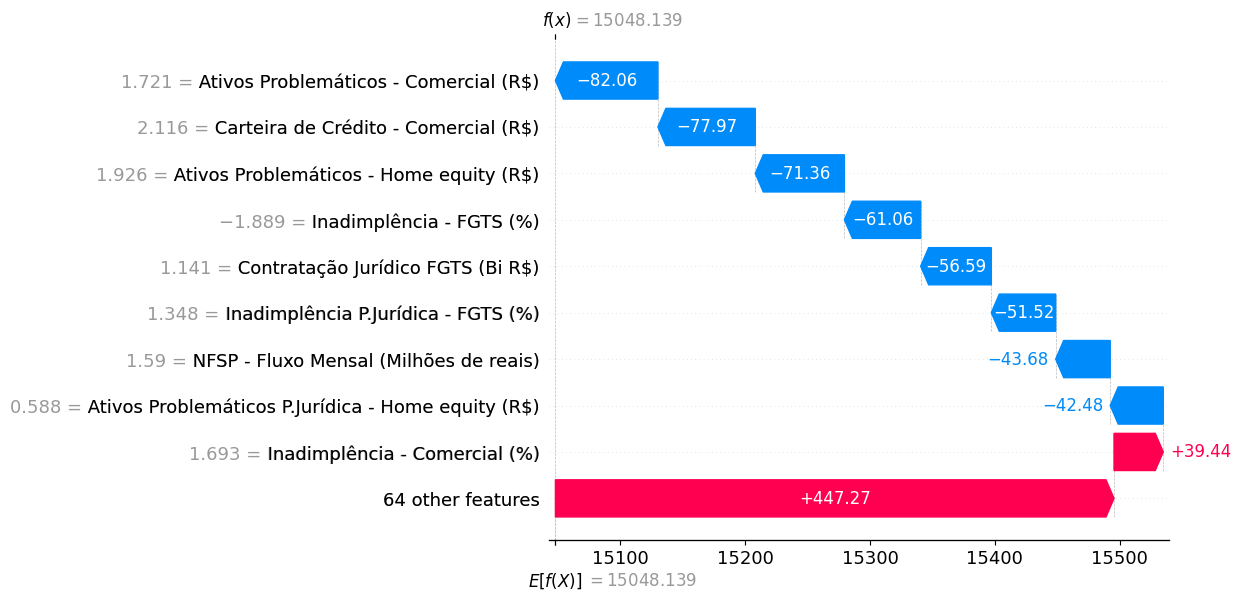

None

'inv true'

array([-26.14526121,  -0.        ,  -0.        ,  -2.69452932,
       -11.14811333,  -3.85122624,  -0.        , -19.89275859,
        -0.        , -11.2529553 , -12.19430603,  20.69458767,
        56.58624472,  25.82871637,  30.21768751,  -0.70143929,
        -0.        ,  -4.94266673, -19.98966359,  82.05745247,
        71.36332716,  30.29312583, -11.42865225,  -3.62014241,
       -21.15722983,  42.47627069, -14.82533321, -23.27343376,
        77.97026932, -13.67684922, -14.57753237,  -7.21288792,
       -21.07003319, -13.6213136 ,  32.14990927,  -4.47723681,
       -21.14382404, -20.37299654,  61.06054897,  -7.62544117,
       -39.43780588, -14.48824013, -19.84978964,  51.52087914,
        -3.2206852 , -22.32855337,  -8.16002267, -25.63096406,
       -25.83582947, -31.66423005,  28.04631544, -25.56993794,
        -9.23745903,  -0.        , -10.08763327, -22.44334018,
       -25.70576566, -29.8247579 ,  -8.0698139 , -11.74527346,
        43.67521685,  14.49974455,  -0.        ,  -0.  

[[13714.51128571]](test_target) - [[15048.139]](prediction) = [-1333.62738616]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 583us/step


array([[ -44.49578428,    0.        ,    0.        ,   78.23944828,
         -60.79342085,    0.        , -122.33251053,    0.        ,
         -42.89988437,    0.        ,  -84.54654766,  -29.99554201,
        -110.87142985,  -96.14730036, -154.77331068,    0.        ,
         -31.08337864,  -69.45911621,   46.14583899, -149.44328013,
         -90.95655094,   -9.87221988,   42.87849583,    0.        ,
           0.        ,  -98.8021463 ,  -15.53774622,  -37.72445889,
         -10.79922469,  -39.1513214 ,  -37.84975374,    0.        ,
         -48.67930784,    0.        ,  -42.04249861,  -21.99467322,
         -64.48015845,  -29.86351807,  -65.11311165,  -54.55102072,
         -60.30757909,  -19.0171936 ,    0.        , -130.39660642,
           0.        ,    0.        ,    0.        , -124.17232027,
           0.        ,  100.87330735,  -16.88632831,   60.37690249,
           0.        ,    0.        ,   57.76119898,  -96.17584075,
           0.        ,  -10.50264891,    0.     

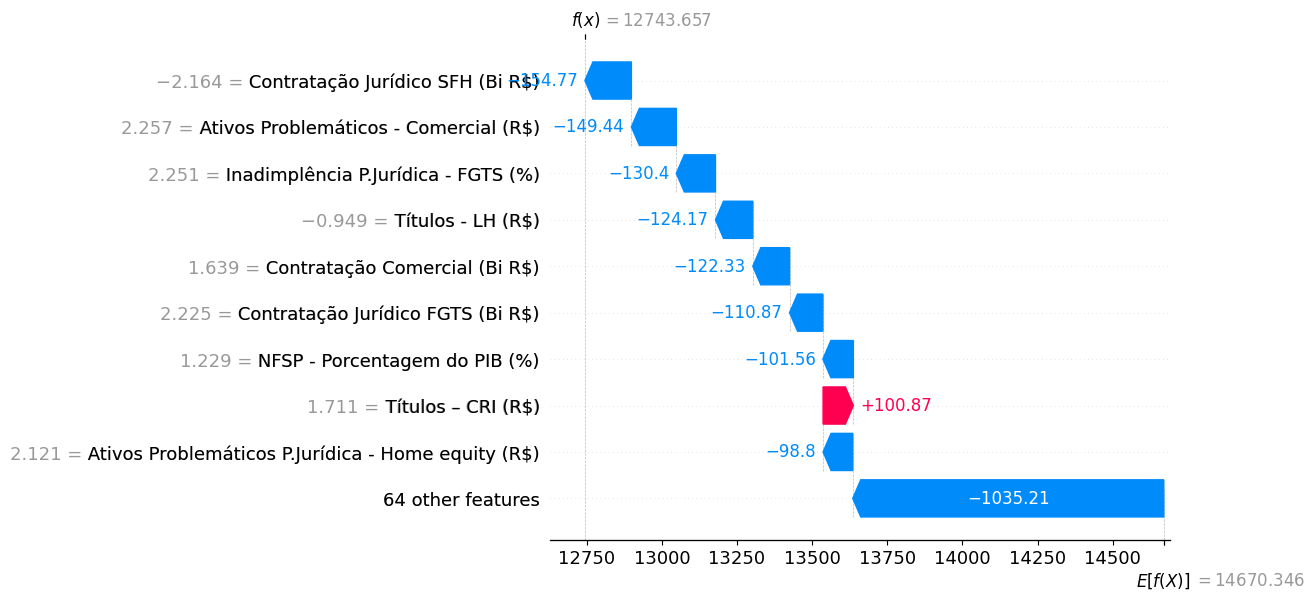

None

'inv true'

array([  44.49578428,   -0.        ,   -0.        ,  -78.23944828,
         60.79342085,   -0.        ,  122.33251053,   -0.        ,
         42.89988437,   -0.        ,   84.54654766,   29.99554201,
        110.87142985,   96.14730036,  154.77331068,   -0.        ,
         31.08337864,   69.45911621,  -46.14583899,  149.44328013,
         90.95655094,    9.87221988,  -42.87849583,   -0.        ,
         -0.        ,   98.8021463 ,   15.53774622,   37.72445889,
         10.79922469,   39.1513214 ,   37.84975374,   -0.        ,
         48.67930784,   -0.        ,   42.04249861,   21.99467322,
         64.48015845,   29.86351807,   65.11311165,   54.55102072,
         60.30757909,   19.0171936 ,   -0.        ,  130.39660642,
         -0.        ,   -0.        ,   -0.        ,  124.17232027,
         -0.        , -100.87330735,   16.88632831,  -60.37690249,
         -0.        ,   -0.        ,  -57.76119898,   96.17584075,
         -0.        ,   10.50264891,   -0.        ,  -66.25824

[[11767.65342857]](test_target) - [[12743.657]](prediction) = [-976.00379799]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 597us/step


array([[ -32.72597996,    0.        ,  -95.01237645,    0.        ,
         -95.92598526,    0.        ,  -54.57743034,    0.        ,
           0.        ,  -38.68823406,  -65.42111012,  -15.59349441,
        -138.43715199, -121.95755563, -102.133497  ,  -13.58661882,
        -142.88282789,    0.        ,    0.        , -135.88248342,
         -57.31373307,    0.        ,  -45.71743843,    0.        ,
         -75.02711802,  -55.59556319,    0.        ,    0.        ,
         -99.26635041, -168.0835391 ,  -42.19702879, -159.84501469,
        -166.24282763,    0.        ,  -10.37039511,    0.        ,
         -68.08853007,    0.        , -117.60386711,  -42.92511412,
        -127.37977636,    0.        ,    0.        ,  -71.44977238,
           0.        ,  -14.53288729,    0.        , -106.66600359,
           0.        ,    0.        ,    0.        ,    0.        ,
         -60.7668232 , -124.62041994,    0.        , -181.85300573,
        -108.74353883,  -21.96937092,    0.     

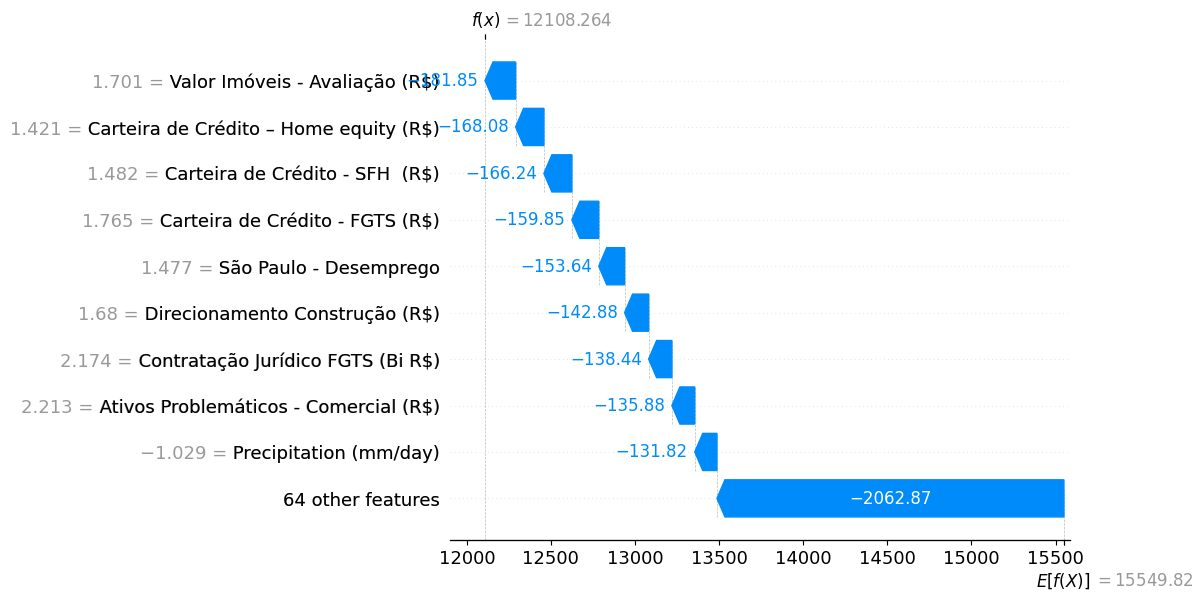

None

'inv true'

array([ 32.72597996,  -0.        ,  95.01237645,  -0.        ,
        95.92598526,  -0.        ,  54.57743034,  -0.        ,
        -0.        ,  38.68823406,  65.42111012,  15.59349441,
       138.43715199, 121.95755563, 102.133497  ,  13.58661882,
       142.88282789,  -0.        ,  -0.        , 135.88248342,
        57.31373307,  -0.        ,  45.71743843,  -0.        ,
        75.02711802,  55.59556319,  -0.        ,  -0.        ,
        99.26635041, 168.0835391 ,  42.19702879, 159.84501469,
       166.24282763,  -0.        ,  10.37039511,  -0.        ,
        68.08853007,  -0.        , 117.60386711,  42.92511412,
       127.37977636,  -0.        ,  -0.        ,  71.44977238,
        -0.        ,  14.53288729,  -0.        , 106.66600359,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        60.7668232 , 124.62041994,  -0.        , 181.85300573,
       108.74353883,  21.96937092,  -0.        ,  -0.        ,
         9.04326572, 113.56884775,  -0.        ,  11.83

[[9811.08428571]](test_target) - [[12108.264]](prediction) = [-2297.17938616]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 592us/step


array([[  -7.65679642,  247.92578841,  -86.04612824,  -19.82329707,
        -149.1562553 ,  237.61742124,    0.        ,    0.        ,
        -178.04962541,    0.        , -296.47773453,  -89.72412342,
        -291.81814891, -264.91114942, -201.25970808,  -54.33563753,
        -114.09078968, -151.66653221,    0.        , -321.08450274,
        -193.90871241,  -51.53722006,  -77.80880517,   44.30381338,
        -212.10184649, -234.62701102,  -95.8168909 , -206.71379137,
        -193.78491352, -175.20378357,  -24.39415014, -193.08658689,
        -231.73877502,  164.5862729 , -109.24429198,    0.        ,
         -78.33272308,  -82.94837653, -262.51161335, -123.96416976,
         -98.06940723,    0.        ,    0.        , -142.95562138,
        -157.47981784, -276.47845614,    0.        , -404.80160708,
           0.        ,  158.23903655,  -93.82618833,  126.33979907,
        -112.08216753, -120.60786488,   92.49792624, -191.84258171,
        -168.59179683,  -54.1120006 ,    0.     

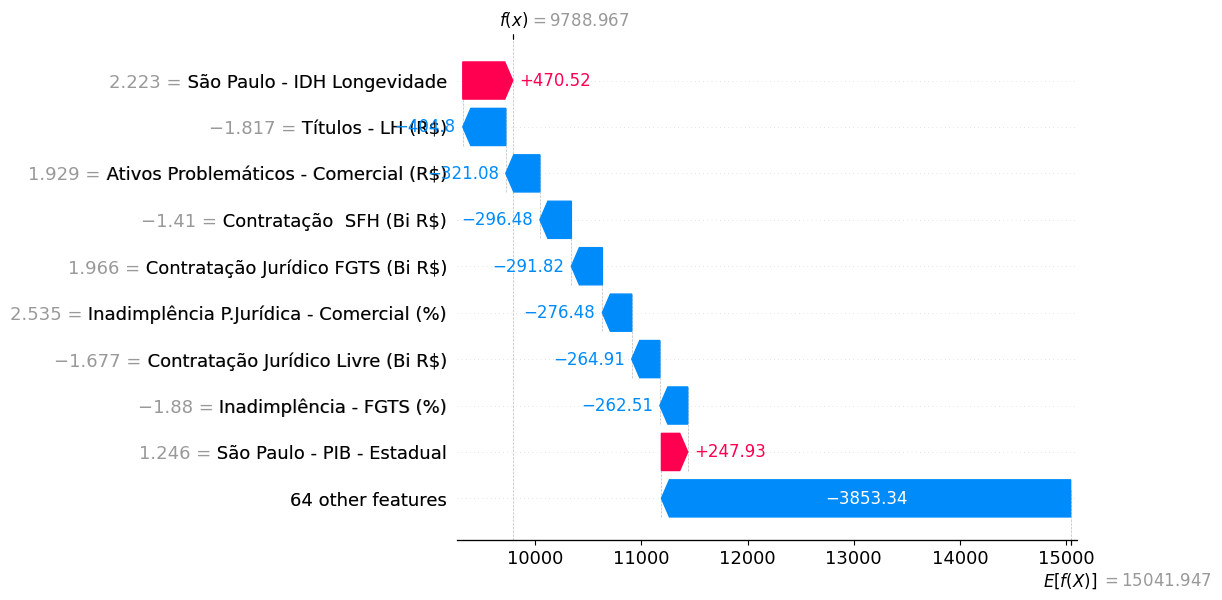

None

'abs true'

array([  7.65679642, 247.92578841,  86.04612824,  19.82329707,
       149.1562553 , 237.61742124,   0.        ,   0.        ,
       178.04962541,   0.        , 296.47773453,  89.72412342,
       291.81814891, 264.91114942, 201.25970808,  54.33563753,
       114.09078968, 151.66653221,   0.        , 321.08450274,
       193.90871241,  51.53722006,  77.80880517,  44.30381338,
       212.10184649, 234.62701102,  95.8168909 , 206.71379137,
       193.78491352, 175.20378357,  24.39415014, 193.08658689,
       231.73877502, 164.5862729 , 109.24429198,   0.        ,
        78.33272308,  82.94837653, 262.51161335, 123.96416976,
        98.06940723,   0.        ,   0.        , 142.95562138,
       157.47981784, 276.47845614,   0.        , 404.80160708,
         0.        , 158.23903655,  93.82618833, 126.33979907,
       112.08216753, 120.60786488,  92.49792624, 191.84258171,
       168.59179683,  54.1120006 ,   0.        , 100.8412756 ,
         0.        ,  31.60387159, 107.39984526,   0.  

[[9918.501]](test_target) - [[9788.967]](prediction) = [129.53420313]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 588us/step


array([[-144.78325228,  209.93872758,  -74.95680303,    0.        ,
         -92.97640192,    0.        ,  -94.23260042,    0.        ,
        -142.23303196,    0.        , -239.96412078,   -2.50792304,
        -265.55664307, -190.73756605,  -36.86990042,  -61.98876191,
        -135.16705331,  -18.37850528,    0.        , -293.26449229,
        -110.94412266,    0.        ,  -55.90639255,    0.        ,
        -185.52799283, -181.59209953,    0.        , -110.35827621,
        -160.44321417, -204.14607406, -142.70373925, -198.91263571,
        -226.8855869 ,    0.        ,  -79.77573931,    0.        ,
         -91.16949351,    0.        , -170.4534223 ,  -35.49654268,
        -100.13389443,    0.        ,    0.        , -130.84876864,
         -55.8747278 , -193.74290739,  -55.75854295, -371.58209954,
           0.        ,  150.49978548,  -40.30912042,    0.        ,
        -145.36622084, -153.57494272,    0.        , -238.21234339,
        -165.25499198,  -49.03639372,  -21.88222

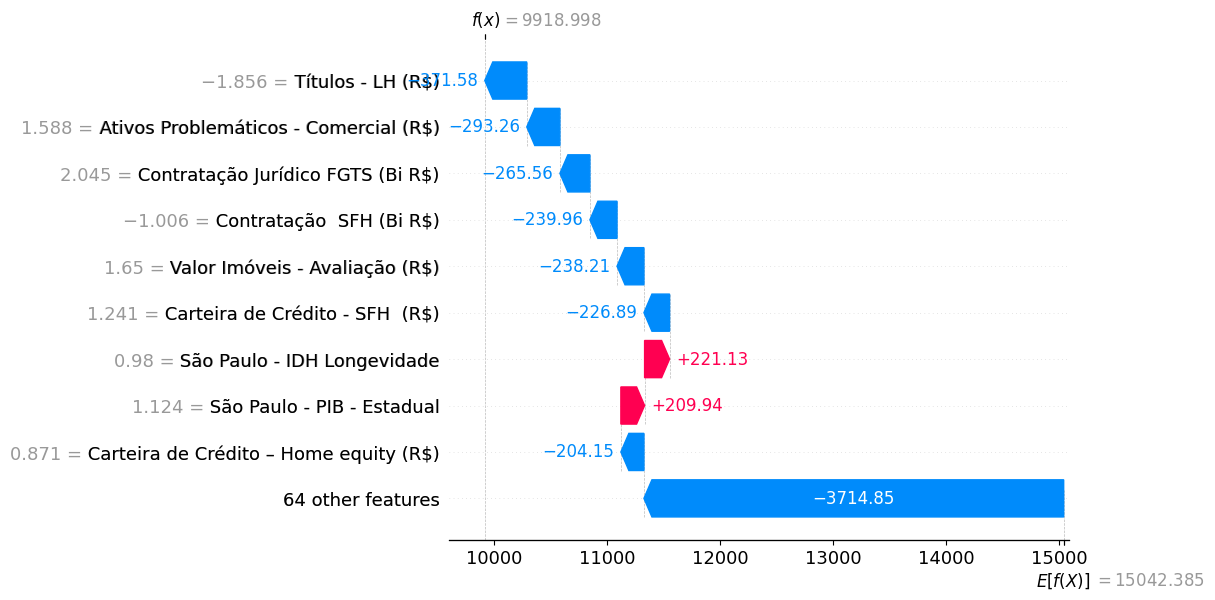

None

'abs true'

array([144.78325228, 209.93872758,  74.95680303,   0.        ,
        92.97640192,   0.        ,  94.23260042,   0.        ,
       142.23303196,   0.        , 239.96412078,   2.50792304,
       265.55664307, 190.73756605,  36.86990042,  61.98876191,
       135.16705331,  18.37850528,   0.        , 293.26449229,
       110.94412266,   0.        ,  55.90639255,   0.        ,
       185.52799283, 181.59209953,   0.        , 110.35827621,
       160.44321417, 204.14607406, 142.70373925, 198.91263571,
       226.8855869 ,   0.        ,  79.77573931,   0.        ,
        91.16949351,   0.        , 170.4534223 ,  35.49654268,
       100.13389443,   0.        ,   0.        , 130.84876864,
        55.8747278 , 193.74290739,  55.75854295, 371.58209954,
         0.        , 150.49978548,  40.30912042,   0.        ,
       145.36622084, 153.57494272,   0.        , 238.21234339,
       165.25499198,  49.03639372,  21.88222116,   0.        ,
         0.        ,  99.9297397 ,   0.        ,  38.36

[[10001.077]](test_target) - [[9918.998]](prediction) = [82.07895312]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 579us/step


array([[ -95.78357196,  238.21400775,  -30.46880262,    0.        ,
         -84.57544833,  -26.90490142, -108.41802756,    0.        ,
        -103.833674  ,    0.        , -154.58550082,    0.        ,
        -214.79119299,  -46.15098844,  -24.50217938,  -92.76434326,
        -175.9089129 ,    0.        ,    0.        , -206.93653121,
         -81.24171118,    0.        ,  -41.98147356,    0.        ,
        -154.29544688, -130.71389453,    0.        ,  -79.6712502 ,
        -112.72451441, -157.74860371, -233.31574068, -227.76693316,
        -187.02760651,    0.        ,  -36.84048619,    0.        ,
         -26.85788749,    0.        ,  -84.86462439,    0.        ,
         -83.78932296,    0.        ,    0.        , -178.88767153,
           0.        , -160.95996504,  -32.68030978, -330.12150508,
           0.        ,    0.        ,    0.        ,    0.        ,
        -136.57787393, -173.32641601,    0.        , -252.72929819,
        -197.44976871,  -72.09939256,  -76.61294

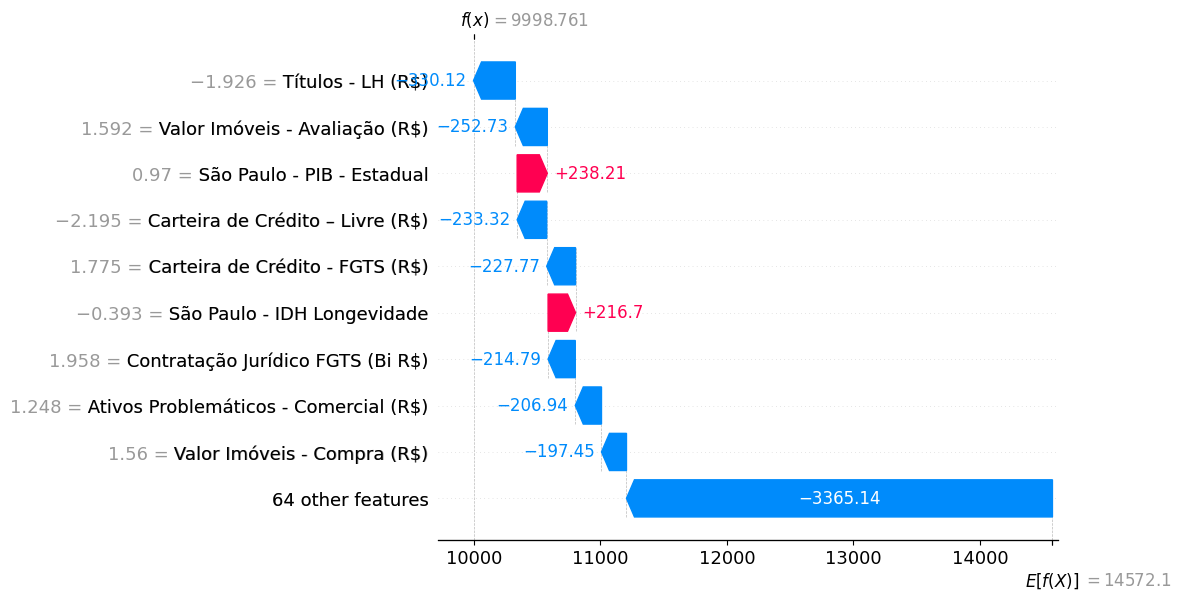

None

'abs true'

array([ 95.78357196, 238.21400775,  30.46880262,   0.        ,
        84.57544833,  26.90490142, 108.41802756,   0.        ,
       103.833674  ,   0.        , 154.58550082,   0.        ,
       214.79119299,  46.15098844,  24.50217938,  92.76434326,
       175.9089129 ,   0.        ,   0.        , 206.93653121,
        81.24171118,   0.        ,  41.98147356,   0.        ,
       154.29544688, 130.71389453,   0.        ,  79.6712502 ,
       112.72451441, 157.74860371, 233.31574068, 227.76693316,
       187.02760651,   0.        ,  36.84048619,   0.        ,
        26.85788749,   0.        ,  84.86462439,   0.        ,
        83.78932296,   0.        ,   0.        , 178.88767153,
         0.        , 160.95996504,  32.68030978, 330.12150508,
         0.        ,   0.        ,   0.        ,   0.        ,
       136.57787393, 173.32641601,   0.        , 252.72929819,
       197.44976871,  72.09939256,  76.6129409 ,   0.        ,
        38.78640374, 106.8933685 ,   0.        ,   0.  

[[10458.276]](test_target) - [[9998.761]](prediction) = [459.51525781]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 625us/step


array([[-130.08946544,    0.        ,  -14.96580895,    0.        ,
         -91.00488681,  -39.19314683,  -87.47341462,  229.38307682,
         -22.36142871,    0.        ,   -9.9293184 ,  -12.97060944,
        -210.78857564,  -19.13588626,  -37.6194284 ,  -78.90732153,
        -158.62183479,    0.        ,  -46.59586113, -187.0140169 ,
         -63.21434639,    0.        ,  -70.29328121,    0.        ,
         -97.71053526,  -67.41534062,    0.        ,  -46.98198686,
         -60.11212936, -175.0451639 , -192.71980392, -197.77803533,
        -250.06177566,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,  -50.04967048,    0.        ,
         -61.70331809,    0.        ,    0.        , -158.88406386,
           0.        , -148.20225948,  -30.91916389, -251.78062997,
           0.        ,    0.        ,    0.        ,    0.        ,
        -121.36735305, -147.01949186,    0.        , -220.15870225,
        -189.75683642,  -74.5988749 ,  -60.84897

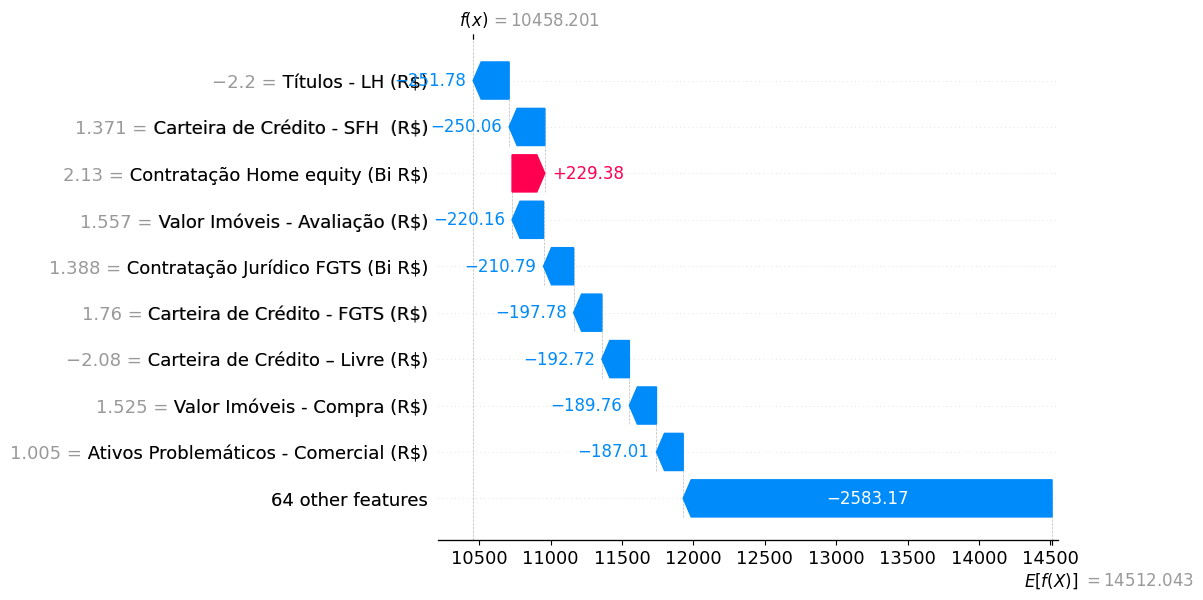

None

array([-130.08946544,    0.        ,  -14.96580895,    0.        ,
        -91.00488681,  -39.19314683,  -87.47341462,  229.38307682,
        -22.36142871,    0.        ,   -9.9293184 ,  -12.97060944,
       -210.78857564,  -19.13588626,  -37.6194284 ,  -78.90732153,
       -158.62183479,    0.        ,  -46.59586113, -187.0140169 ,
        -63.21434639,    0.        ,  -70.29328121,    0.        ,
        -97.71053526,  -67.41534062,    0.        ,  -46.98198686,
        -60.11212936, -175.0451639 , -192.71980392, -197.77803533,
       -250.06177566,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,  -50.04967048,    0.        ,
        -61.70331809,    0.        ,    0.        , -158.88406386,
          0.        , -148.20225948,  -30.91916389, -251.78062997,
          0.        ,    0.        ,    0.        ,    0.        ,
       -121.36735305, -147.01949186,    0.        , -220.15870225,
       -189.75683642,  -74.5988749 ,  -60.84897235,    0.     

[[11181.809]](test_target) - [[10458.201]](prediction) = [723.60782812]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 36ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 584us/step


array([[-146.70425731,   84.79561822,  -25.01709   ,    0.        ,
           0.        ,    0.        , -160.02371005,  252.04287537,
           0.        , -125.45435679,   91.85292405,   80.23528497,
        -166.31050812,    0.        ,  -77.26761848, -104.18522797,
        -202.88452869,    0.        ,  -85.41561502, -162.18494881,
         -42.18123616,  126.32073473,  -67.47010961, -112.8345785 ,
         -76.27042995,  -22.34206104,    0.        ,    0.        ,
         -71.96700335, -272.69724371, -135.74282613, -194.01042163,
        -302.85772017,    0.        ,    0.        ,   74.8248723 ,
          42.78124282,    0.        ,    0.        ,  149.43210625,
         -12.34433473,  178.61202261,  132.83919399, -174.52298528,
           0.        ,  -69.10432688, -142.47789992, -251.432637  ,
         152.45480098,  -80.68745553,    0.        ,  -36.96873854,
        -184.51585497, -226.4603742 , -144.08686037, -270.25510847,
        -219.20950106, -143.31963772,  -44.57365

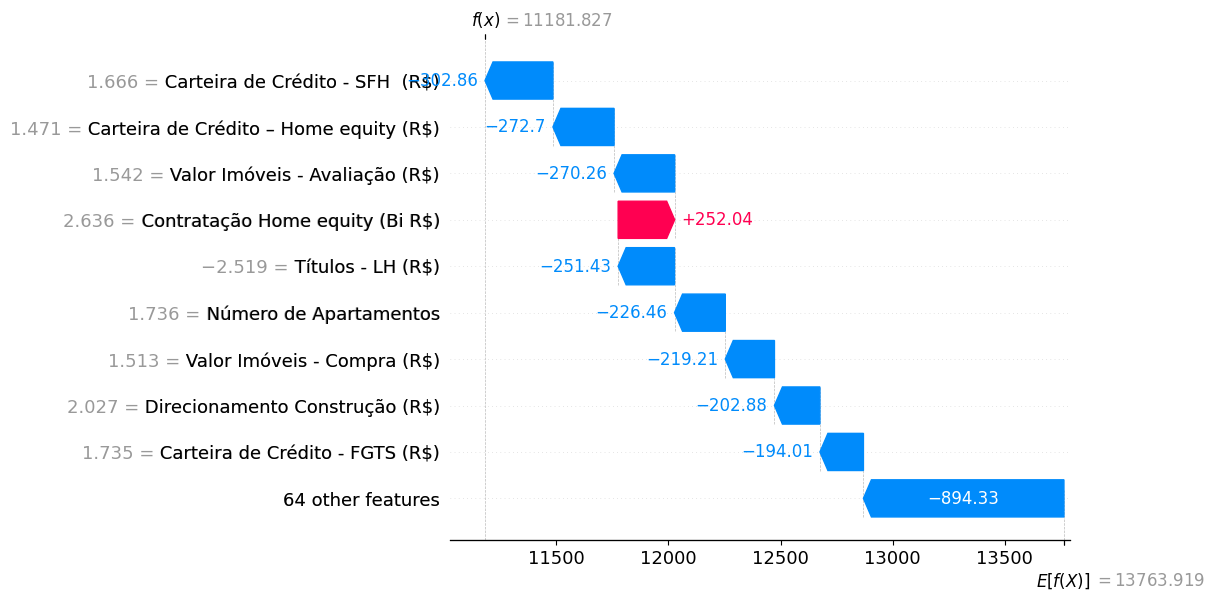

None

array([-146.70425731,   84.79561822,  -25.01709   ,    0.        ,
          0.        ,    0.        , -160.02371005,  252.04287537,
          0.        , -125.45435679,   91.85292405,   80.23528497,
       -166.31050812,    0.        ,  -77.26761848, -104.18522797,
       -202.88452869,    0.        ,  -85.41561502, -162.18494881,
        -42.18123616,  126.32073473,  -67.47010961, -112.8345785 ,
        -76.27042995,  -22.34206104,    0.        ,    0.        ,
        -71.96700335, -272.69724371, -135.74282613, -194.01042163,
       -302.85772017,    0.        ,    0.        ,   74.8248723 ,
         42.78124282,    0.        ,    0.        ,  149.43210625,
        -12.34433473,  178.61202261,  132.83919399, -174.52298528,
          0.        ,  -69.10432688, -142.47789992, -251.432637  ,
        152.45480098,  -80.68745553,    0.        ,  -36.96873854,
       -184.51585497, -226.4603742 , -144.08686037, -270.25510847,
       -219.20950106, -143.31963772,  -44.57365867,    0.     

[[12113.838]](test_target) - [[11181.827]](prediction) = [932.01085156]


'-------------------------------------------------------------------'

[14871.9296875,
 15160.77734375,
 15048.138671875,
 12743.6572265625,
 12108.263671875,
 9788.966796875,
 9918.998046875,
 9998.7607421875,
 10458.201171875,
 11181.8271484375]

In [35]:
predictions, targets, shap_calc = model_time_series_mae_tester(data.iloc[:-1,:], 4, winner_seed)
predictions

In [41]:
shap_calc

array([  92.25394899,  780.87414197,  246.50121139,  -61.11068053,
        424.20151095,  266.35383164,  213.73515947,  461.5331936 ,
        452.31194891,  -89.94179523,  991.7051672 ,  228.04169505,
        754.83004822,  771.23800774,  462.50075311,   49.54391155,
        295.7191434 ,  234.56148697, -192.03839632,  917.44177253,
        514.25142801,  286.40701163,   35.17268619,  -72.15090753,
        450.34662778,  660.16142741,   96.52930391,  368.42732714,
        592.83018724,  380.10077064,  237.68304153,  443.22074063,
        378.88080302,  150.96495931,  310.42332048,   92.34230871,
        397.93370856,  121.5740528 ,  762.25103446,  430.51653473,
        410.12240739,  210.9996191 ,  112.98940435,  386.79327492,
        210.13386045,  457.25310879,  -81.15259958,  921.22772501,
        154.17092426,   95.5138291 ,  223.55209896,    3.42422009,
        186.52190699,  271.48546877, -119.43776638,  530.8388191 ,
        263.70438055,  -30.01315384,   -9.97632358,   24.82322

In [42]:
shap_vector = pd.DataFrame([shap_calc], columns=test_input.columns)
shap_vector

,São Paulo - IDH Educacao,São Paulo - PIB - Estadual,São Paulo - PIB - Construção Civil,São Paulo - PIB - Per Capita,São Paulo - PIB - Preços de Mercado,São Paulo - IDH Renda,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),Contratação FGTS (Bi R$),...,São Paulo - IDH,São Paulo - Desemprego,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),São Paulo - IDH Longevidade
0,92.253949,780.874142,246.501211,-61.110681,424.201511,266.353832,213.735159,461.533194,452.311949,-89.941795,...,204.404241,515.648602,215.391741,235.311698,13.677959,258.812263,135.57976,332.174608,217.515599,897.804394


In [43]:
asc_shap_vector = shap_vector.iloc[0].sort_values()
asc_shap_vector = pd.DataFrame([asc_shap_vector.values], columns=asc_shap_vector.index)
asc_shap_vector

,Direcionamento Aplicação (R$),Número de Casas,Contratação FGTS (Bi R$),Poupança e Empréstimo - SBPE (R$),Ativos Problemáticos - FGTS (R$),São Paulo - PIB - Per Capita,Quantidade de imóves - Condomínio,Quantidade de imóves – Isolado,Imóvel Área - Privativa (m²),Global Radiation - Daylight (Kj/m²),...,Carteira de Crédito - Comercial (R$),Ativos Problemáticos P.Jurídica - Home equity (R$),Contratação Jurídico FGTS (Bi R$),Inadimplência - FGTS (%),Contratação Jurídico Livre (Bi R$),São Paulo - PIB - Estadual,São Paulo - IDH Longevidade,Ativos Problemáticos - Comercial (R$),Títulos - LH (R$),Contratação SFH (Bi R$)
0,-192.038396,-119.437766,-89.941795,-81.1526,-72.150908,-61.110681,-30.013154,-9.976324,3.42422,13.677959,...,592.830187,660.161427,754.830048,762.251034,771.238008,780.874142,897.804394,917.441773,921.227725,991.705167


In [44]:
mae = mean_absolute_error(predictions, targets)
mae

729.2791320312492

In [45]:
porcentage = mae/np.mean(targets)
porcentage

0.061173062651317